In [3]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
x=np.linspace(-5.0,5.0,100)
y=np.sqrt(10**2-x**2)
y=np.hstack([y,-y])
x=np.hstack([x,-x])

In [7]:
x1=np.linspace(-5.0,5.0,100)
y1=np.sqrt(5**2-x1**2)
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

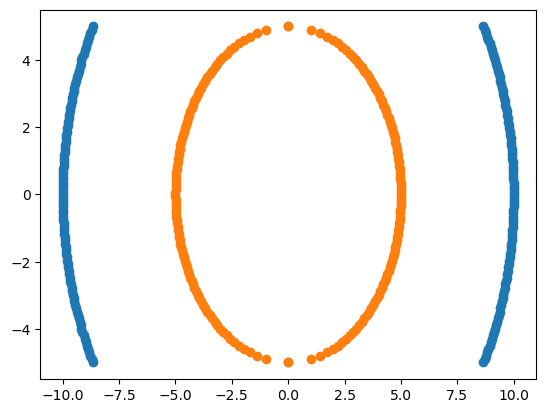

In [9]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [11]:
import pandas as pd
df1=pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2=pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)  # Combine dataframes and reindex
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [13]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
df=sns.load_dataset('tips')

In [19]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [23]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [25]:
df['smoker'].value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

In [27]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [29]:
df['time'].value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [31]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [33]:
#we first need to seperate independant and dependant features before encoding so as to avoid data leakage
X=df[['tip', 'sex', 'smoker', 'day', 'time', 'size']]
y=df['total_bill']

In [35]:
#again train test split before the encoding to avoid data leakage
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=28)

In [37]:
#Now we do encoding for the categorical features. We will do LabelEncoding for binary data and One-Hot Encoding for polynomail data
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()#create three label encoders for 3 seperate binary data as all binary datasets are different
le2=LabelEncoder()
le3=LabelEncoder()

In [39]:
X_train['sex']=le1.fit_transform(X_train['sex'])
X_train['smoker']=le2.fit_transform(X_train['smoker'])
X_train['time']=le3.fit_transform(X_train['time'])

In [41]:
X_train.head()

,tip,sex,smoker,day,time,size
50,2.50,1,0,Sun,0,2
96,4.00,1,1,Fri,0,2
217,1.50,1,1,Sat,0,2
157,3.75,0,0,Sun,0,4
0,1.01,0,0,Sun,0,2


In [43]:
#use transform for test data and fit_transform for training data
X_test['sex']=le1.transform(X_test['sex'])
X_test['smoker']=le2.transform(X_test['smoker'])
X_test['time']=le3.transform(X_test['time'])

In [45]:
#One-hot encoding
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [47]:
ct = ColumnTransformer(
    transformers=[('onehot', OneHotEncoder(drop='first'), [3])],
    remainder='passthrough'
)

In [49]:
X_train = ct.fit_transform(X_train)

In [51]:
X_test=ct.transform(X_test)

In [53]:
from sklearn.svm import SVR
svr=SVR()

In [55]:
svr.fit(X_train,y_train)

SVR()

In [57]:
y_pred=svr.predict(X_test)

In [61]:
from sklearn.metrics import r2_score,mean_absolute_error
print(r2_score(y_pred,y_test))
print(mean_absolute_error(y_pred,y_test))

-0.819436314806752
4.4237992503451045


In [71]:
from sklearn.model_selection import GridSearchCV
param_grid={
    'C':[0.1,1,10,100,1000],
    'gamma':[1,0.1,0.01,0.001,0.0001],
    'kernel':['rbf']
}

In [73]:
grid=GridSearchCV(SVR(),param_grid,refit=True,verbose=3)

In [75]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.029 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.034 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.021 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.008 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=1, kernel=rbf;, score=-0.075 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.068 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.071 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.147 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.1, kernel=rbf;, score=-0.003 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.01, kernel=rbf;, score=-0.006 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [79]:
print(grid.best_params_)

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [81]:
grid_predictions=grid.predict(X_test)

In [83]:
print(r2_score(grid_predictions,y_test))
print(mean_absolute_error(grid_predictions,y_test))

-0.4281449138363107
4.317828590437312
